In [1]:
# Importar las bibliotecas necesarias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

### 1 CARGAR LOS DATOS

In [2]:
df = pd.read_csv('../data/teleCust1000t.csv')  # Reemplazar con la ruta de tu dataset
print("Dimensiones del dataset:", df.shape)
print("\nInformación del dataset:")
df.head()

Dimensiones del dataset: (1000, 12)

Información del dataset:


,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


### 2 RESUMEN ESTADISTICO

In [3]:
print("\nEstadísticas descriptivas:")
df.describe()


Estadísticas descriptivas:


,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
count,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.0220,35.526000,41.684000,0.495000,11.551000,77.535000,2.671000,10.987000,0.047000,0.517000,2.331000,2.487000
std,0.8162,21.359812,12.558816,0.500225,10.086681,107.044165,1.222397,10.082087,0.211745,0.499961,1.435793,1.120306
min,1.0000,1.000000,18.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,1.0000,17.000000,32.000000,0.000000,3.000000,29.000000,2.000000,3.000000,0.000000,0.000000,1.000000,1.000000
50%,2.0000,34.000000,40.000000,0.000000,9.000000,47.000000,3.000000,8.000000,0.000000,1.000000,2.000000,3.000000
75%,3.0000,54.000000,51.000000,1.000000,18.000000,83.000000,4.000000,17.000000,0.000000,1.000000,3.000000,3.000000
max,3.0000,72.000000,77.000000,1.000000,55.000000,1668.000000,5.000000,47.000000,1.000000,1.000000,8.000000,4.000000


### 3 VERIFICAR VALORES FALTANTES Y DUPLICADOS

In [4]:
missing_values = df.isnull().sum()
print("\nValores faltantes por columna:")
print(missing_values)

duplicates = df.duplicated().sum()
print(f"\nRegistros duplicados: {duplicates}")


Valores faltantes por columna:
region     0
tenure     0
age        0
marital    0
address    0
income     0
ed         0
employ     0
retire     0
gender     0
reside     0
custcat    0
dtype: int64

Registros duplicados: 0


### 4 DISTRIBUCION VARIABLE OBJETO 

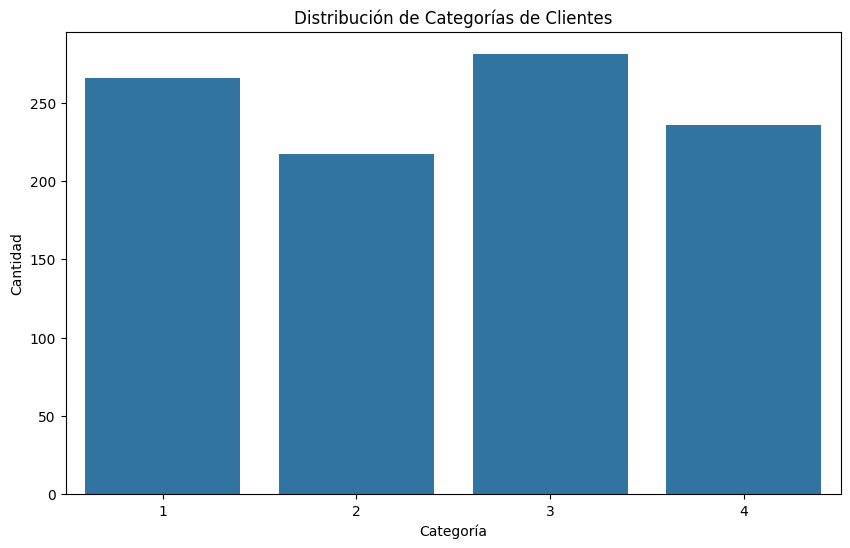


Porcentaje por categoría:
custcat
3    28.1
1    26.6
4    23.6
2    21.7
Name: count, dtype: float64


In [5]:
plt.figure(figsize=(10, 6))
class_dist = df['custcat'].value_counts()
sns.barplot(x=class_dist.index, y=class_dist.values)
plt.title('Distribución de Categorías de Clientes')
plt.xlabel('Categoría')
plt.ylabel('Cantidad')
plt.show()

print("\nPorcentaje por categoría:")
print((class_dist / len(df) * 100).round(2))

### 5 ANALISIS DE VARIABLE NUMERICA

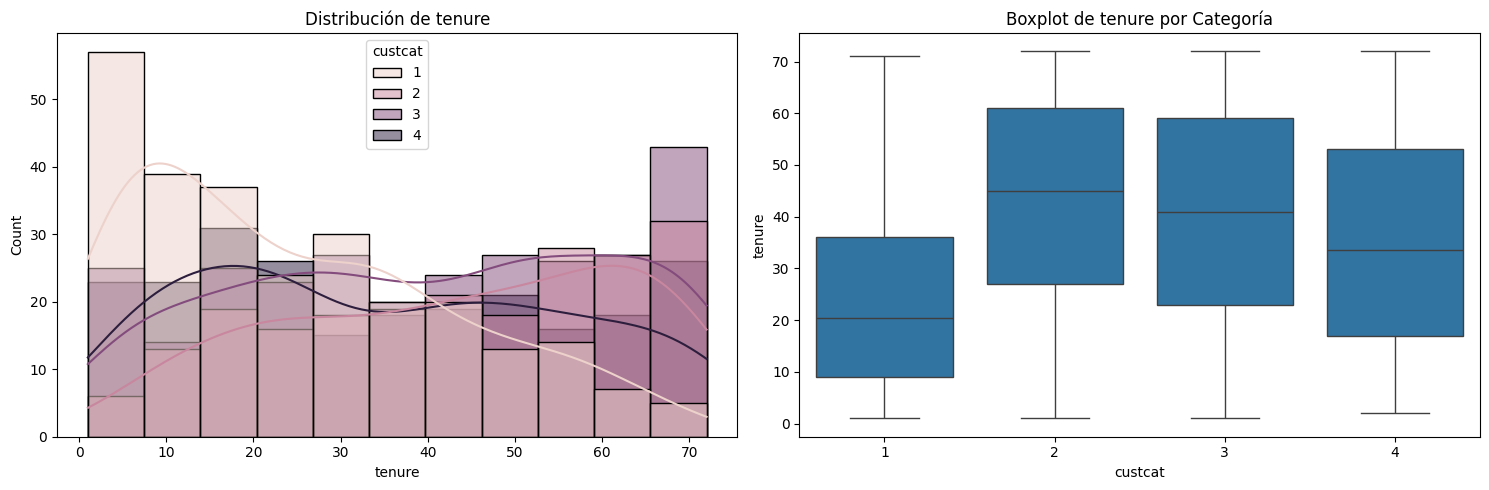

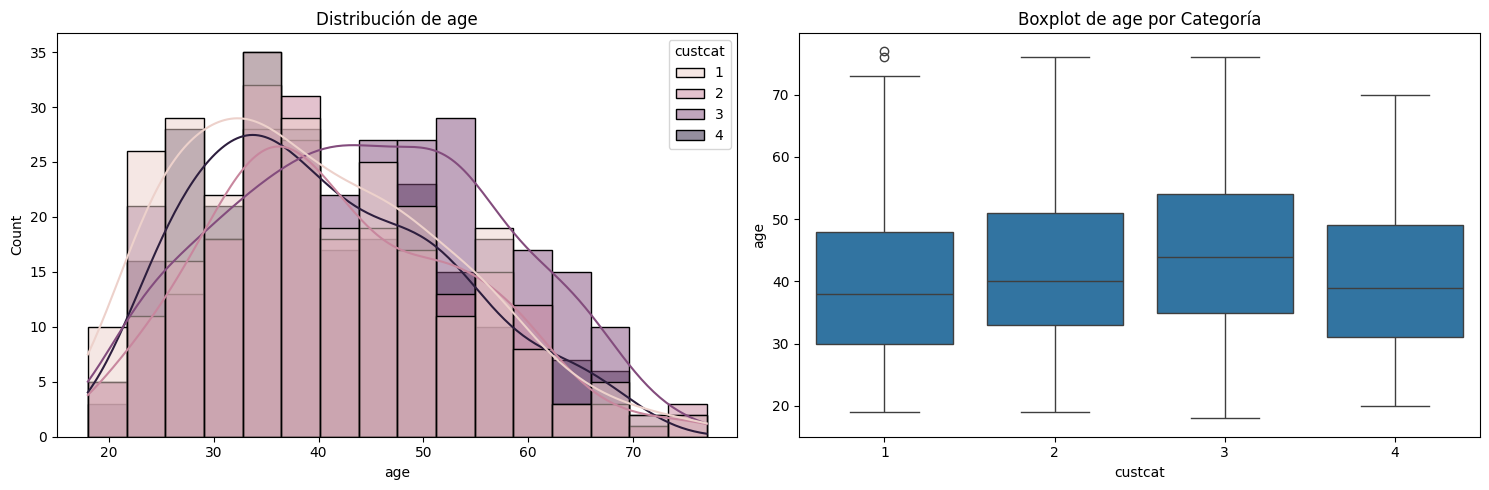

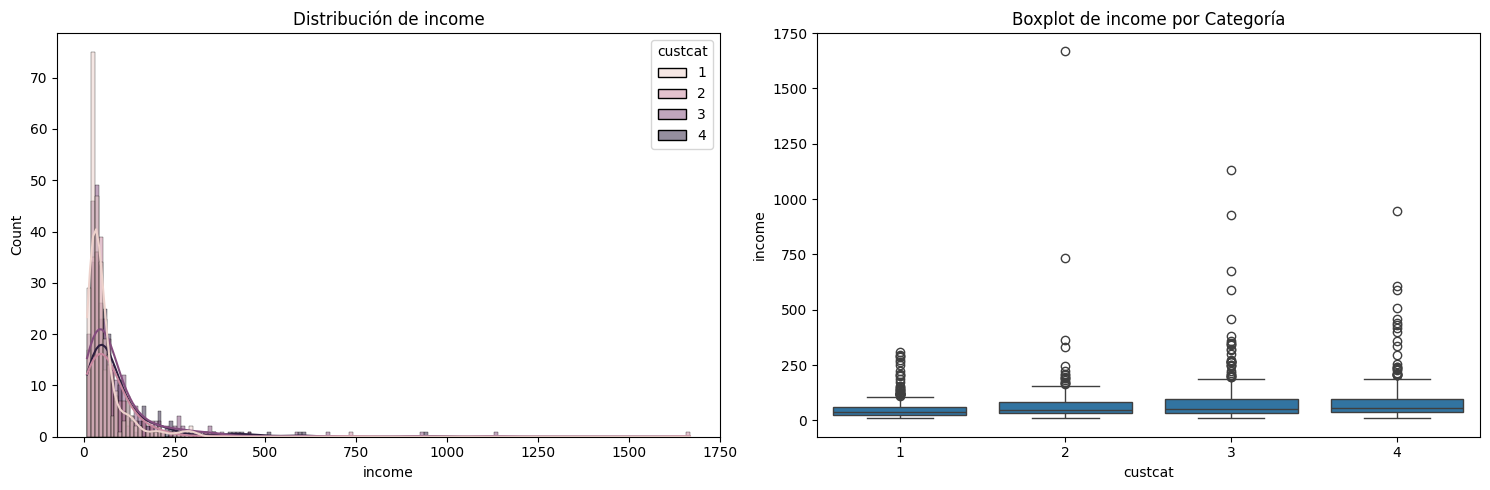

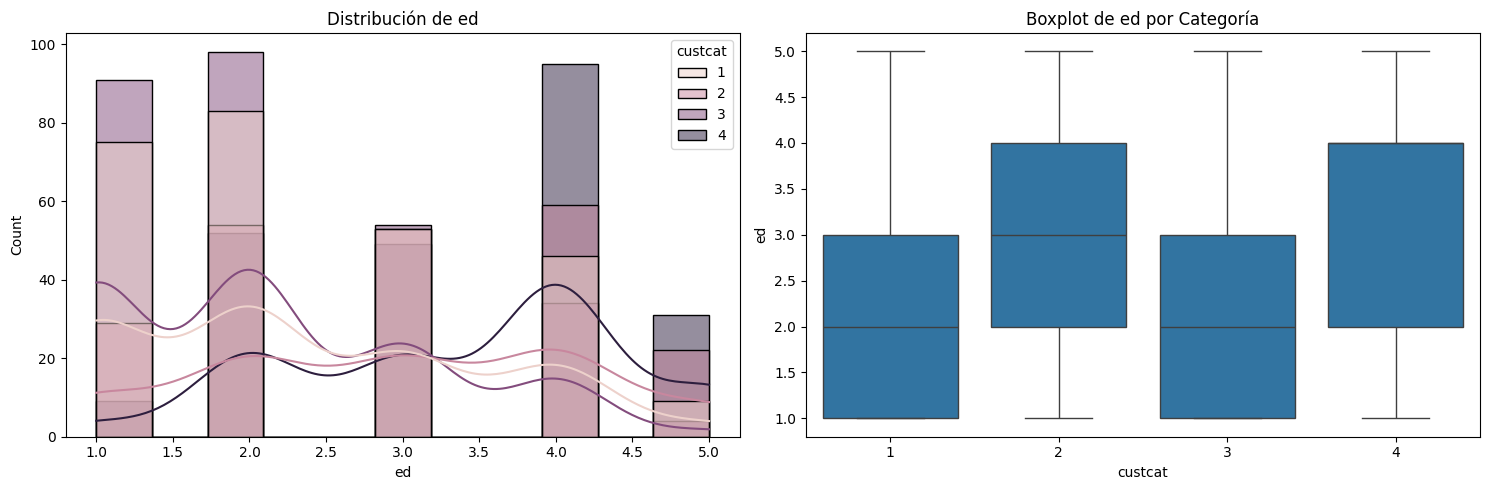

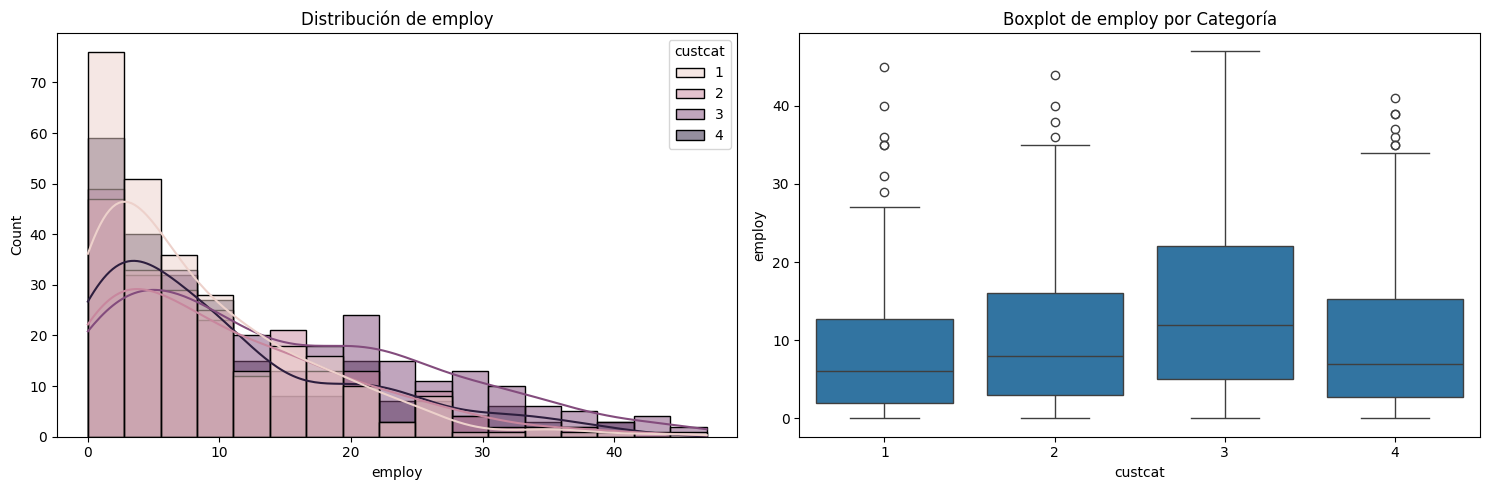

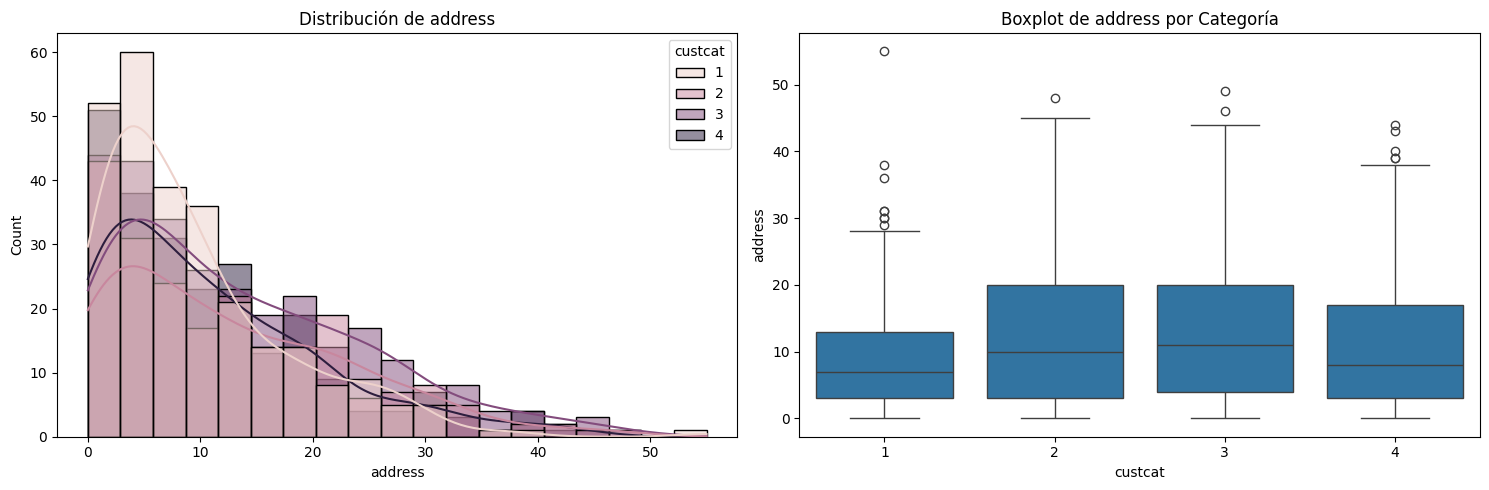

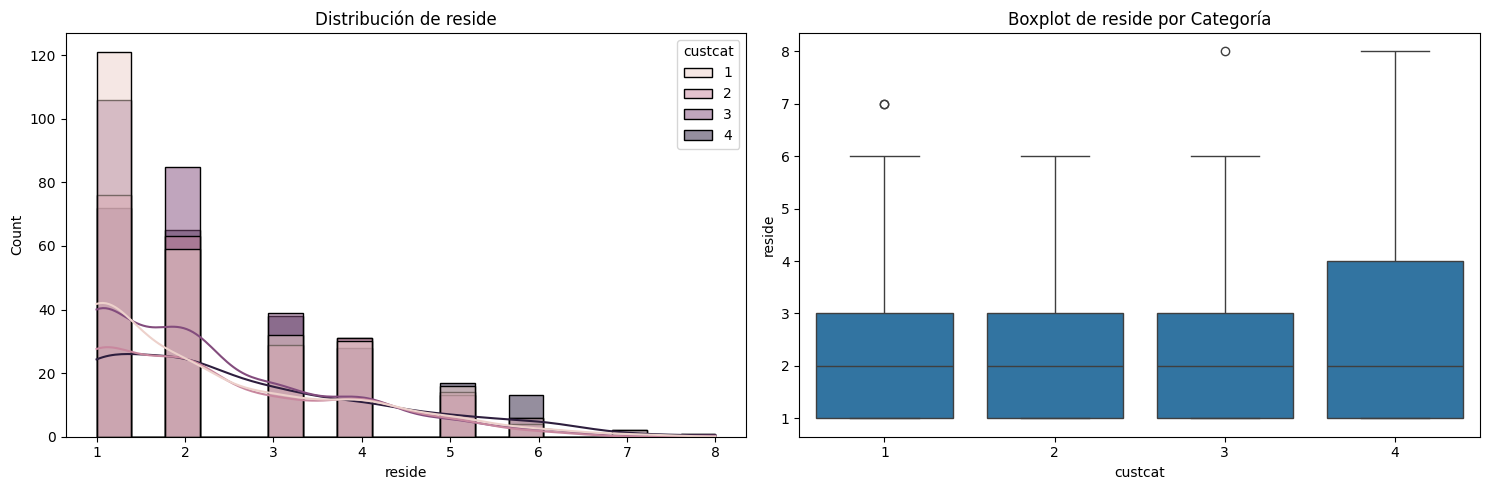

In [6]:
numeric_cols = ['tenure', 'age', 'income', 'ed', 'employ', 'address', 'reside']
for col in numeric_cols:
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

    # Histograma
    sns.histplot(data=df, x=col, hue='custcat', kde=True, ax=ax1)
    ax1.set_title(f'Distribución de {col}')

    # Boxplot
    sns.boxplot(data=df, x='custcat', y=col, ax=ax2)
    ax2.set_title(f'Boxplot de {col} por Categoría')

    plt.tight_layout()
    plt.show()

### 6 ANALISSI DE VARIABLES CATEGORICAS 

<Figure size 1000x600 with 0 Axes>

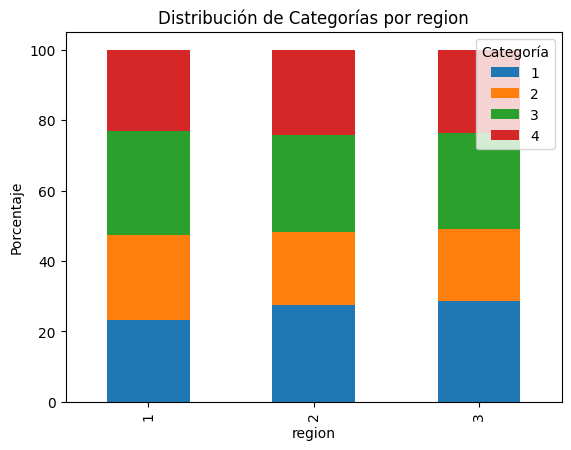

<Figure size 1000x600 with 0 Axes>

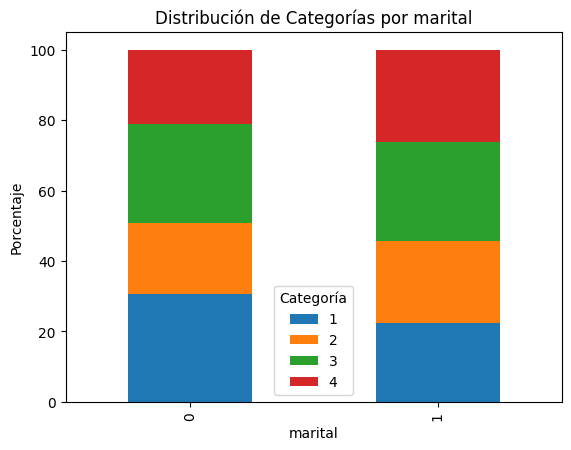

<Figure size 1000x600 with 0 Axes>

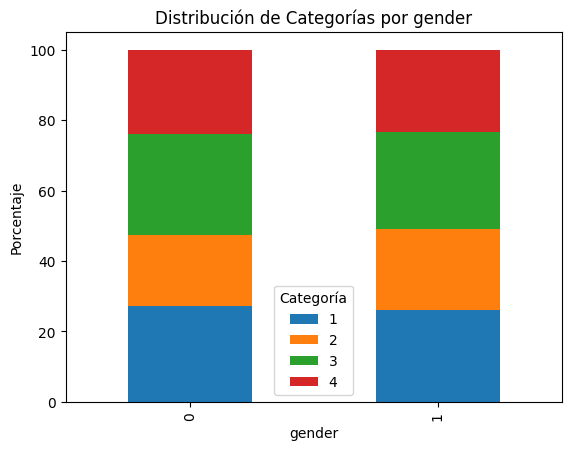

In [7]:
cat_cols = ['region', 'marital', 'gender']
for col in cat_cols:
    plt.figure(figsize=(10, 6))
    crosstab = pd.crosstab(df[col], df['custcat'], normalize='index') * 100
    crosstab.plot(kind='bar', stacked=True)
    plt.title(f'Distribución de Categorías por {col}')
    plt.xlabel(col)
    plt.ylabel('Porcentaje')
    plt.legend(title='Categoría')
    plt.show()

### 7 MATRIZ DE CORRELACION

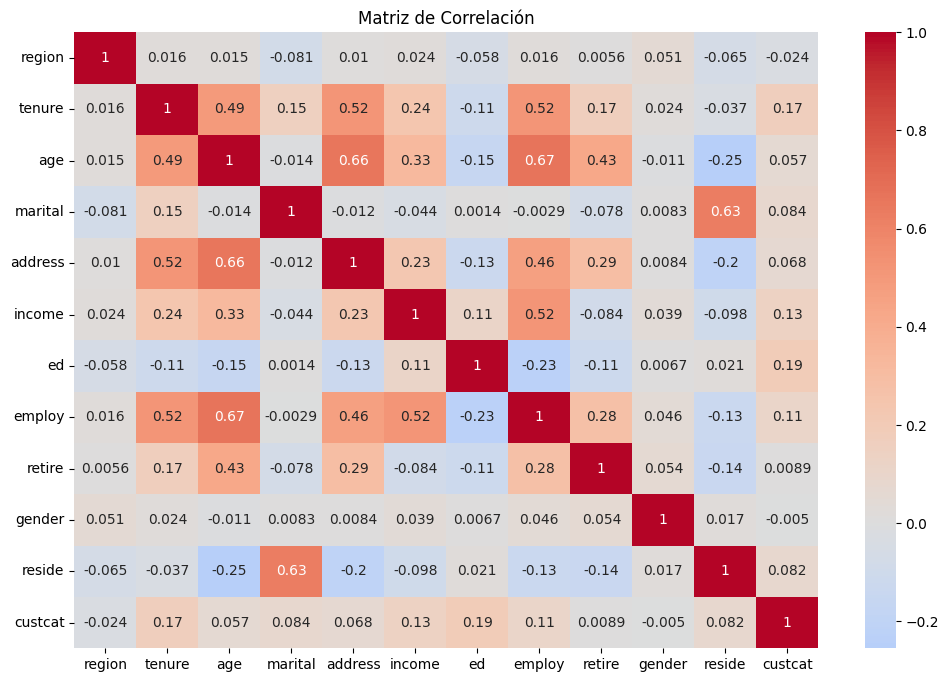

In [8]:
plt.figure(figsize=(12, 8))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de Correlación')
plt.show()

### 8 FEATURE ENGINEERING

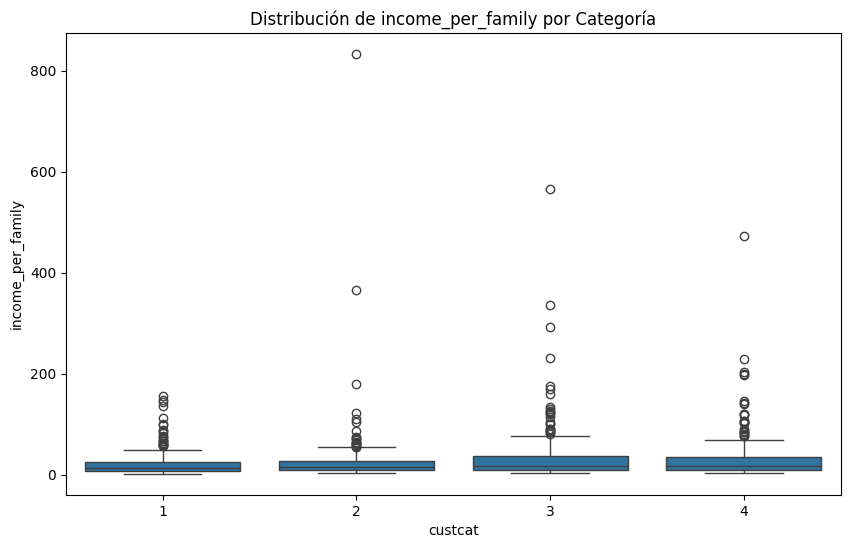

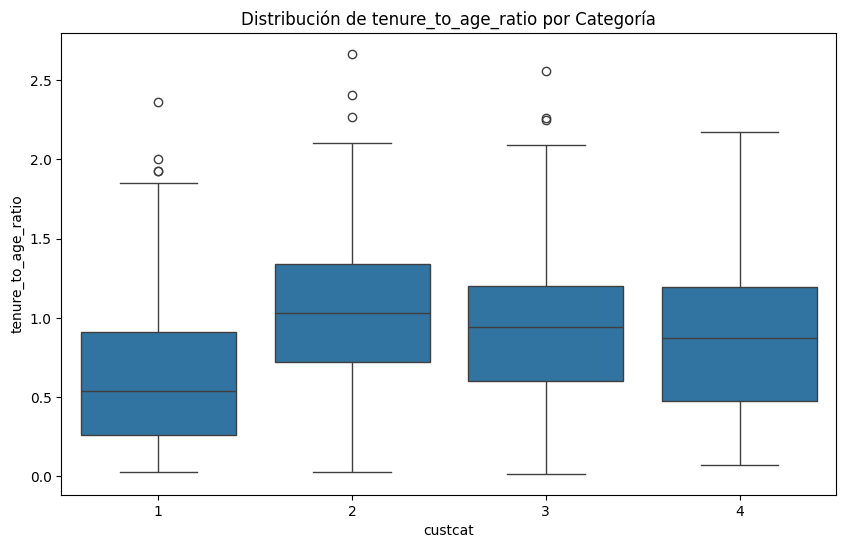

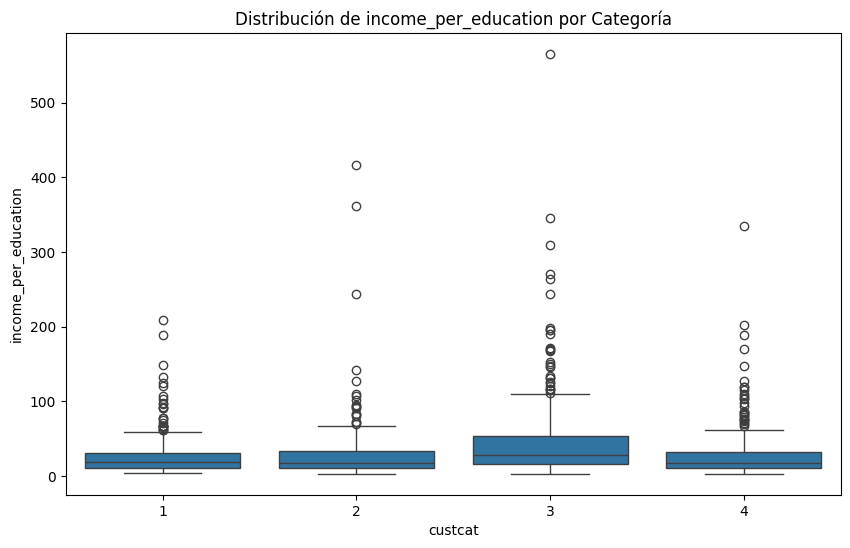

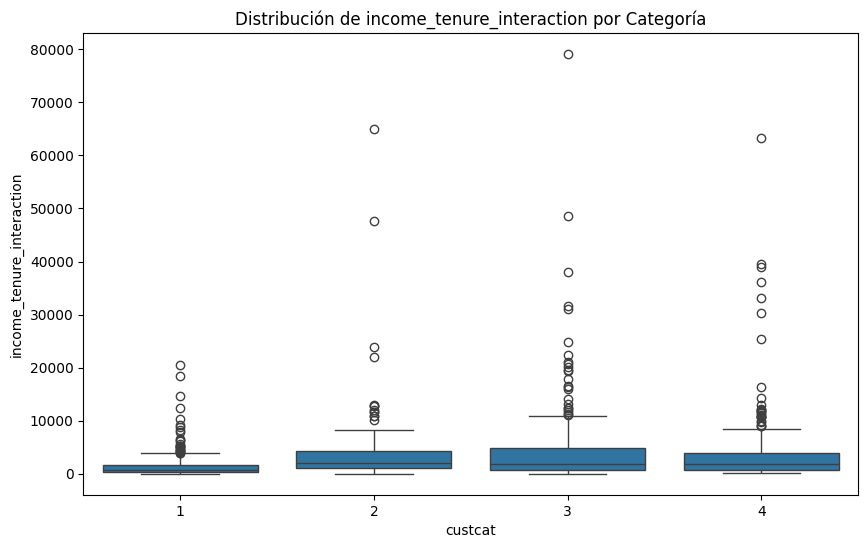

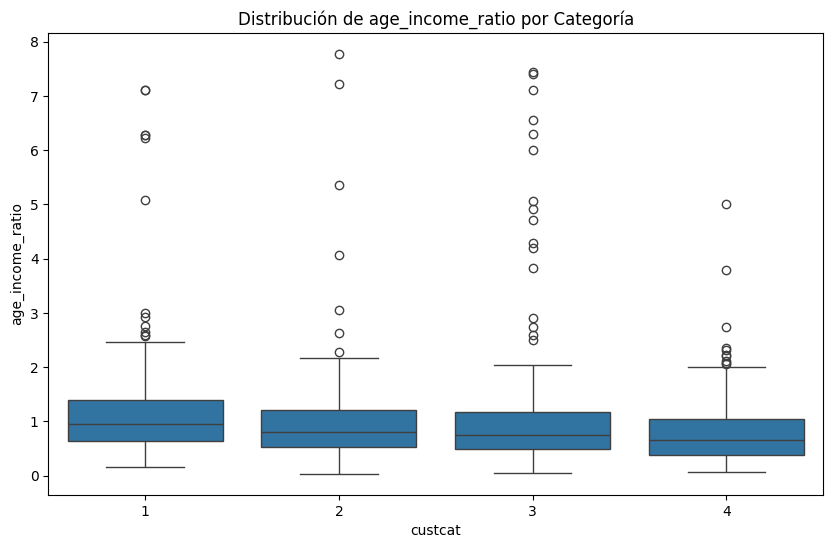

In [9]:
df['income_per_family'] = df['income'] / (df['reside'] + 1)
df['tenure_to_age_ratio'] = df['tenure'] / df['age']
df['income_per_education'] = df['income'] / df['ed']

# Segmentación
df['age_segment'] = pd.qcut(df['age'], q=5, labels=['Very Young', 'Young', 'Middle', 'Senior', 'Very Senior'])
df['income_segment'] = pd.qcut(df['income'], q=5, labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])
df['tenure_segment'] = pd.qcut(df['tenure'], q=5, labels=['New', 'Recent', 'Established', 'Loyal', 'Very Loyal'])

# Interacciones
df['income_tenure_interaction'] = df['income'] * df['tenure']
df['age_income_ratio'] = df['age'] / df['income']

# Validación visual de las nuevas características
new_features = ['income_per_family', 'tenure_to_age_ratio', 'income_per_education',
                'income_tenure_interaction', 'age_income_ratio']
for col in new_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df, x='custcat', y=col)
    plt.title(f'Distribución de {col} por Categoría')
    plt.show()

In [10]:
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat,income_per_family,tenure_to_age_ratio,income_per_education,age_segment,income_segment,tenure_segment,income_tenure_interaction,age_income_ratio
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1,21.333333,0.295455,16.0,Middle,High,New,832.0,0.687500
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4,19.428571,0.333333,27.2,Young,Very High,New,1496.0,0.242647
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3,38.666667,1.307692,116.0,Senior,Very High,Very Loyal,7888.0,0.448276
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1,16.500000,1.000000,16.5,Young,Low,Established,1089.0,1.000000
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3,6.000000,0.766667,30.0,Very Young,Low,Recent,690.0,1.000000


### 9 ESCALADO DE VARIABLES NUMERICAS

In [11]:
scaler = StandardScaler()
numeric_cols_to_scale = ['tenure', 'age', 'income', 'address', 'ed', 'employ', 'reside']
df[numeric_cols_to_scale] = scaler.fit_transform(df[numeric_cols_to_scale])

print("\nDataset procesado listo para modelado:")
print(df.head())

# Guardar el DataFrame procesado
df.to_csv('../data/proc_escalado.csv', index=False)
print("\nDataFrame procesado guardado")


Dataset procesado listo para modelado:
   region    tenure       age  marital   address    income        ed  \
0       2 -1.055125  0.184505        1 -0.253034 -0.126506  1.087753   
1       3 -1.148806 -0.691812        1 -0.451415  0.546450  1.906227   
2       3  1.521092  0.821826        1  1.234819  0.359517 -1.367671   
3       2 -0.118319 -0.691812        0  0.044536 -0.416251 -0.549196   
4       2 -0.586722 -0.930808        1 -0.253034 -0.444291 -1.367671   

     employ  retire  gender    reside  custcat  income_per_family  \
0 -0.594123     0.0       0 -0.230650        1          21.333333   
1 -0.594123     0.0       0  2.556662        4          19.428571   
2  1.787528     0.0       1 -0.230650        3          38.666667   
3 -1.090300     0.0       1 -0.927478        1          16.500000   
4 -0.891829     0.0       0  1.163006        3           6.000000   

   tenure_to_age_ratio  income_per_education age_segment income_segment  \
0             0.295455               

### 10 MODELO Y ENTRENAMIENTO 

In [12]:
import optuna
import numpy as np
import pandas as pd
import tensorflow as tf
import os
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential, save_model
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import classification_report, accuracy_score
import datetime

def prepare_data():
   try:
       # Cargar el dataset ya escalado
       df = pd.read_csv('../data/proc_escalado.csv')

       print("Columnas en el dataset:", df.columns.tolist())
       print("\nTipos de datos:")
       print(df.dtypes)

       # Convertir columnas categóricas
       categorical_columns = ['age_segment', 'income_segment', 'tenure_segment']

       for col in categorical_columns:
           if col in df.columns:
               df[col] = pd.Categorical(df[col]).codes

       # Separar features y target
       X = df.drop('custcat', axis=1)
       y = df['custcat'] - 1  # Ajustar las clases para que empiecen en 0

       print("\nColumnas después de la codificación:")
       print(X.dtypes)

       return X, y

   except Exception as e:
       print(f"Error en la preparación de datos: {str(e)}")
       raise

def create_model_optuna(trial, input_shape):
   n_layers = trial.suggest_int('n_layers', 1, 5)
   learning_rate = trial.suggest_float('learning_rate', 1e-5, 1e-1, log=True)
   dropout_rate = trial.suggest_float('dropout_rate', 0.1, 0.5)
   first_units = trial.suggest_int('first_units', 32, 512)
   activation = trial.suggest_categorical('activation', ['relu', 'elu', 'selu'])

   model = Sequential()

   # Primera capa
   model.add(Dense(first_units, activation=activation, input_shape=(input_shape,)))
   model.add(BatchNormalization())
   model.add(Dropout(dropout_rate))

   # Capas ocultas
   for i in range(n_layers):
       units = trial.suggest_int(f'units_layer_{i}', 16, first_units)
       model.add(Dense(units, activation=activation))
       model.add(BatchNormalization())
       model.add(Dropout(dropout_rate))

   # Capa de salida
   model.add(Dense(4, activation='softmax'))

   optimizer = Adam(learning_rate=learning_rate)
   model.compile(optimizer=optimizer,
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

   return model

def objective(trial):
   batch_size = trial.suggest_categorical('batch_size', [16, 32, 64, 128])

   model = create_model_optuna(trial, X_train.shape[1])

   # Crear directorio para checkpoints si no existe
   checkpoint_dir = '../models/checkpoints'
   os.makedirs(checkpoint_dir, exist_ok=True)

   # Callbacks con la extensión .keras
   callbacks = [
       EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),
       ModelCheckpoint(
           filepath=os.path.join(checkpoint_dir, f'trial_{trial.number}_checkpoint.keras'),
           monitor='val_accuracy',
           save_best_only=True
       )
   ]

   try:
       history = model.fit(
           X_train,
           y_train,
           batch_size=batch_size,
           epochs=50,
           validation_data=(X_val, y_val),
           callbacks=callbacks,
           verbose=0
       )

       return max(history.history['val_accuracy'])
   except Exception as e:
       print(f"Error en trial {trial.number}: {str(e)}")
       raise

def main():
   try:
       # Crear directorios necesarios
       os.makedirs('../models', exist_ok=True)

       # Preparar datos
       print("Preparando datos...")
       global X_train, X_val, X_test, y_train, y_val, y_test
       X, y = prepare_data()

       # Split de datos
       print("\nRealizando split de datos...")
       X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
       X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

       print("Formas de los conjuntos de datos:")
       print(f"X_train: {X_train.shape}")
       print(f"X_val: {X_val.shape}")
       print(f"X_test: {X_test.shape}")

       # Optimización
       print("\nIniciando optimización de hiperparámetros...")
       study = optuna.create_study(direction='maximize')
       study.optimize(objective, n_trials=50)

       # Guardar resultados de la optimización
       timestamp = datetime.datetime.now().strftime("%Y%m%d_%H%M%S")
       results = {
           'best_params': study.best_params,
           'best_value': study.best_value,
           'all_trials': study.trials_dataframe().to_dict()
       }

       results_file = f'../models/optimization_results_{timestamp}.pkl'
       pd.to_pickle(results, results_file)
       print(f"\nResultados de optimización guardados en: {results_file}")

       print("\nMejores hiperparámetros encontrados:")
       for key, value in study.best_params.items():
           print(f"{key}: {value}")

       print(f"\nMejor accuracy: {study.best_value:.4f}")

       # Entrenar modelo final
       print("\nEntrenando modelo final...")
       final_model = create_model_optuna(study.best_trial, X_train.shape[1])

       final_callbacks = [
           EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True),
           ModelCheckpoint(
               filepath=f'../models/best_model_{timestamp}.keras',
               monitor='val_accuracy',
               save_best_only=True
           )
       ]

       history = final_model.fit(
           X_train,
           y_train,
           batch_size=study.best_params['batch_size'],
           epochs=100,
           validation_data=(X_val, y_val),
           callbacks=final_callbacks,
           verbose=1
       )

       # Guardar el modelo final
       final_model_path = f'../models/final_model_{timestamp}.keras'
       final_model.save(final_model_path)
       print(f"\nModelo final guardado en: {final_model_path}")

       # Evaluar modelo final
       print("\nEvaluando modelo final...")
       y_pred = np.argmax(final_model.predict(X_test), axis=1)
       print("\nReporte de clasificación en conjunto de prueba:")
       print(classification_report(y_test, y_pred))

       # Guardar métricas finales
       metrics = {
           'classification_report': classification_report(y_test, y_pred, output_dict=True),
           'history': history.history,
           'best_params': study.best_params,
           'feature_names': X.columns.tolist()
       }

       metrics_file = f'../models/model_metrics_{timestamp}.pkl'
       pd.to_pickle(metrics, metrics_file)
       print(f"\nMétricas guardadas en: {metrics_file}")

       # Visualizar importancia de hiperparámetros
       importance = optuna.importance.get_param_importances(study)
       print("\nImportancia de los hiperparámetros:")
       for param, score in importance.items():
           print(f"{param}: {score:.4f}")

   except Exception as e:
       print(f"Error en la ejecución principal: {str(e)}")
       raise

if __name__ == "__main__":
   main()

c:\Users\Administrator\Desktop\telecom_customer\ML-Refuerzo-Freddy\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[I 2024-12-06 13:48:17,982] A new study created in memory with name: no-name-f9610e40-08b2-41b1-93db-05958edbb98a


Preparando datos...
Columnas en el dataset: ['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed', 'employ', 'retire', 'gender', 'reside', 'custcat', 'income_per_family', 'tenure_to_age_ratio', 'income_per_education', 'age_segment', 'income_segment', 'tenure_segment', 'income_tenure_interaction', 'age_income_ratio']

Tipos de datos:
region                         int64
tenure                       float64
age                          float64
marital                        int64
address                      float64
income                       float64
ed                           float64
employ                       float64
retire                       float64
gender                         int64
reside                       float64
custcat                        int64
income_per_family            float64
tenure_to_age_ratio          float64
income_per_education         float64
age_segment                   object
income_segment                object
tenure_segment           

c:\Users\Administrator\Desktop\telecom_customer\ML-Refuerzo-Freddy\venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
[I 2024-12-06 13:48:25,412] Trial 0 finished with value: 0.39375001192092896 and parameters: {'batch_size': 64, 'n_layers': 4, 'learning_rate': 0.013361202732205861, 'dropout_rate': 0.3374986284624816, 'first_units': 357, 'activation': 'elu', 'units_layer_0': 96, 'units_layer_1': 69, 'units_layer_2': 246, 'units_layer_3': 83}. Best is trial 0 with value: 0.39375001192092896.
c:\Users\Administrator\Desktop\telecom_customer\ML-Refuerzo-Freddy\venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer usin


Resultados de optimización guardados en: ../models/optimization_results_20241206_135548.pkl

Mejores hiperparámetros encontrados:
batch_size: 16
n_layers: 3
learning_rate: 0.0010834738483859207
dropout_rate: 0.19611298937269506
first_units: 186
activation: selu
units_layer_0: 169
units_layer_1: 74
units_layer_2: 72

Mejor accuracy: 0.4563

Entrenando modelo final...
Epoch 1/100


c:\Users\Administrator\Desktop\telecom_customer\ML-Refuerzo-Freddy\venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.2745 - loss: 1.9256 - val_accuracy: 0.2688 - val_loss: 2.0967
Epoch 2/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2927 - loss: 1.6486 - val_accuracy: 0.2688 - val_loss: 1.7583
Epoch 3/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3079 - loss: 1.5212 - val_accuracy: 0.2313 - val_loss: 2.1006
Epoch 4/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3034 - loss: 1.5334 - val_accuracy: 0.2562 - val_loss: 1.6750
Epoch 5/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2780 - loss: 1.5338 - val_accuracy: 0.2688 - val_loss: 1.5046
Epoch 6/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3127 - loss: 1.4918 - val_accuracy: 0.2625 - val_loss: 1.3764
Epoch 7/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3236 - loss: 1.4370 - val_accuracy: 0.3500 - val_loss: 1.3057
Epoch 8/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2854 - loss: 1.4819 - val_accuracy: 0.3250 - val_loss: 1.